In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import string
import warnings
import missingno
warnings.filterwarnings('ignore')


import pandas as pd
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import numpy as np
from numpy.random import gamma
from numpy.random import multivariate_normal
from scipy.stats import multivariate_t
from scipy.stats import f
import matplotlib.pyplot as plt



cf.go_offline(connected = True)


import pandas as pd
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import numpy as np
from numpy.random import gamma
from numpy.random import multivariate_normal
from scipy.stats import multivariate_t
from scipy.stats import f
import matplotlib.pyplot as plt
import missingno


cf.go_offline(connected = True)


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import string
import warnings
import missingno

D:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
df = pd.read_csv('물품_입찰공고_내역.csv',encoding ='utf-8',error_bad_lines= False)
df = pd.concat([df,pd.read_csv('물품_입찰공고_내역_2019.csv',encoding ='utf-8',error_bad_lines= False)])
df = pd.concat([df,pd.read_csv('물품_입찰공고_내역_2018.csv',encoding ='utf-8',error_bad_lines= False)])
df_물품_입찰공고_내역 = pd.concat([df,pd.read_csv('물품_입찰공고_내역_2017.csv',encoding ='utf-8',error_bad_lines= False)])


b'Skipping line 114977: expected 55 fields, saw 56\n'


In [6]:
# df_물품_입찰공고_내역_2['공고게시일자']
df_물품_입찰공고_내역['공고게시일자'].describe()

count    1.360680e+05
mean     2.019882e+07
std      5.250049e+03
min      2.017012e+07
25%      2.020022e+07
50%      2.020053e+07
75%      2.020092e+07
max      2.021010e+07
Name: 공고게시일자, dtype: float64

In [7]:

df_물품_입찰공고_내역.columns


df_물품_입찰공고_내역_2 = df_물품_입찰공고_내역[ ['조달구분', '공고시스템명', '입찰공고번호', '입찰공고차수', '공고게시일자', '실수요기관명', '수요기관명', '수요기관코드', '수요기관구분', '품명내용',
       '세부품명내용', '합계수량', '합계금액', '납품기한', '긴급공고여부', '정정공고여부', '취소공고여부', '추정가격',
       '배정예산', '입찰서개시일자', '입찰서마감일자', '개찰일자', '입찰방식', '재입찰허용여부',
       '낙찰자결정방법', '입찰계약방법', '낙찰하한율', '예가방법','조달요청번호']].copy()

def make_time_series_3(row):
    lst_all = []
    for i in row:
        i = str(i)
        year = i[0:4]
        month = i[4:6]
        date =  i[6:8]

        lst_all.append([pd.to_datetime(year+month+date,format='%Y%m%d')])
    return lst_all


# In[259]:
wbc= make_time_series_3(df_물품_입찰공고_내역_2['공고게시일자'])

df_물품_입찰공고_내역_2.reset_index(inplace=True)
df_물품_입찰공고_내역_2.loc[:,'공고게시일자'] =wbc

df_물품_입찰공고_내역_2['수요기관코드'] = df_물품_입찰공고_내역_2['수요기관코드'].astype('str')

df_test = df_물품_입찰공고_내역_2[df_물품_입찰공고_내역_2['수요기관코드'] == str(1690000)]
df_test.head(2)




,index,조달구분,공고시스템명,입찰공고번호,입찰공고차수,공고게시일자,실수요기관명,수요기관명,수요기관코드,수요기관구분,...,입찰서개시일자,입찰서마감일자,개찰일자,입찰방식,재입찰허용여부,낙찰자결정방법,입찰계약방법,낙찰하한율,예가방법,조달요청번호
1305,1305,중앙조달,NaN,20200318789,0,2020-03-12,방위사업청,방위사업청,1690000,국가기관,...,20200318.0,20200320.0,20200320,전자입찰,Y,"적격심사(추정가격 고시금액미만 제조입찰,고시금액미만 구매입찰)",제한(총액),NaN,복수예가,1220209690.0
34606,34606,중앙조달,NaN,20200429508,0,2020-04-21,방위사업청,방위사업청,1690000,국가기관,...,20200427.0,20200429.0,20200429,전자입찰,Y,"적격심사(추정가격 고시금액이상 10억원미만 제조입찰,고시금액이상 구매입찰)",일반(총액),NaN,복수예가,1220814094.0


In [8]:
df_물품_입찰공고_내역_2[df_물품_입찰공고_내역_2['수요기관코드'] == str(1690000)].head()

,index,조달구분,공고시스템명,입찰공고번호,입찰공고차수,공고게시일자,실수요기관명,수요기관명,수요기관코드,수요기관구분,...,입찰서개시일자,입찰서마감일자,개찰일자,입찰방식,재입찰허용여부,낙찰자결정방법,입찰계약방법,낙찰하한율,예가방법,조달요청번호
1305,1305,중앙조달,NaN,20200318789,0,2020-03-12,방위사업청,방위사업청,1690000,국가기관,...,20200318.0,20200320.0,20200320,전자입찰,Y,"적격심사(추정가격 고시금액미만 제조입찰,고시금액미만 구매입찰)",제한(총액),NaN,복수예가,1220209690.0
34606,34606,중앙조달,NaN,20200429508,0,2020-04-21,방위사업청,방위사업청,1690000,국가기관,...,20200427.0,20200429.0,20200429,전자입찰,Y,"적격심사(추정가격 고시금액이상 10억원미만 제조입찰,고시금액이상 구매입찰)",일반(총액),NaN,복수예가,1220814094.0
37499,37499,중앙조달,NaN,20200616201,0,2020-06-15,방위사업청,방위사업청,1690000,국가기관,...,20200624.0,20200626.0,20200626,전자입찰,Y,"적격심사(추정가격 고시금액미만 제조입찰,고시금액미만 구매입찰)",제한(총액),NaN,복수예가,1220236451.0
39028,39028,중앙조달,NaN,20200530962,0,2020-05-25,방위사업청,방위사업청,1690000,국가기관,...,20200529.0,20200529.0,20200529,전자시담,Y,수의(최저가),수의(총액),NaN,단일예가,1220200257.0
41387,41387,중앙조달,NaN,20200435002,0,2020-04-25,방위사업청,방위사업청,1690000,국가기관,...,20200512.0,20200514.0,20200514,전자입찰,Y,적격심사(추정가격 10억원이상 제조입찰),일반(총액),NaN,복수예가,1220200257.0


In [9]:
df_test['배정예산'].isnull().sum()

1

In [10]:
df_test.head(2)

,index,조달구분,공고시스템명,입찰공고번호,입찰공고차수,공고게시일자,실수요기관명,수요기관명,수요기관코드,수요기관구분,...,입찰서개시일자,입찰서마감일자,개찰일자,입찰방식,재입찰허용여부,낙찰자결정방법,입찰계약방법,낙찰하한율,예가방법,조달요청번호
1305,1305,중앙조달,NaN,20200318789,0,2020-03-12,방위사업청,방위사업청,1690000,국가기관,...,20200318.0,20200320.0,20200320,전자입찰,Y,"적격심사(추정가격 고시금액미만 제조입찰,고시금액미만 구매입찰)",제한(총액),NaN,복수예가,1220209690.0
34606,34606,중앙조달,NaN,20200429508,0,2020-04-21,방위사업청,방위사업청,1690000,국가기관,...,20200427.0,20200429.0,20200429,전자입찰,Y,"적격심사(추정가격 고시금액이상 10억원미만 제조입찰,고시금액이상 구매입찰)",일반(총액),NaN,복수예가,1220814094.0


In [11]:
df_test['공고게시일자'].sort_values()

136022   2017-01-24
136028   2017-02-02
136029   2017-02-10
136023   2017-02-16
136024   2017-02-23
            ...    
119169   2020-12-31
119168   2020-12-31
119170   2020-12-31
119172   2020-12-31
119128   2020-12-31
Name: 공고게시일자, Length: 24029, dtype: datetime64[ns]

In [12]:
df_test.dropna(subset = ['배정예산'],inplace= True)

In [13]:
df_test.columns

Index(['index', '조달구분', '공고시스템명', '입찰공고번호', '입찰공고차수', '공고게시일자', '실수요기관명',
       '수요기관명', '수요기관코드', '수요기관구분', '품명내용', '세부품명내용', '합계수량', '합계금액', '납품기한',
       '긴급공고여부', '정정공고여부', '취소공고여부', '추정가격', '배정예산', '입찰서개시일자', '입찰서마감일자',
       '개찰일자', '입찰방식', '재입찰허용여부', '낙찰자결정방법', '입찰계약방법', '낙찰하한율', '예가방법',
       '조달요청번호'],
      dtype='object')

In [14]:
df_test['배정예산'].isnull().sum()

0

In [15]:
df_물품_입찰공고_내역_new = pd.read_csv('물품_입찰공고_내역_2.csv',encoding ='utf-8',error_bad_lines= False)

df_물품_입찰공고_내역_new.columns


# In[256]:


df_물품_입찰공고_내역_new = df_물품_입찰공고_내역_new[ ['조달구분', '공고시스템명', '입찰공고번호', '입찰공고차수', '공고게시일자', '실수요기관명', '수요기관명', '수요기관코드', '수요기관구분', '품명내용',
       '세부품명내용', '합계수량', '합계금액', '납품기한', '긴급공고여부', '정정공고여부', '취소공고여부', '추정가격',
       '배정예산', '입찰서개시일자', '입찰서마감일자', '개찰일자', '입찰방식', '재입찰허용여부',
       '낙찰자결정방법', '입찰계약방법', '낙찰하한율', '예가방법','조달요청번호']].copy()

df_물품_입찰공고_내역_new['공고게시일자'] = pd.DataFrame(make_time_series_3(df_물품_입찰공고_내역_new['공고게시일자']))
# In[257]:



# In[272]:


df_test_2 = df_물품_입찰공고_내역_new[df_물품_입찰공고_내역_new['수요기관코드'] == str(1690000)]



df_test_2_mini =df_test_2[['공고게시일자','배정예산']].groupby(pd.Grouper(key = '공고게시일자',freq = 'W')).sum()




In [16]:

dt = pd.DatetimeIndex(df_test['공고게시일자'])

df_test['day'] = dt.day
df_test['month'] = dt.month
df_test['year'] = dt.year
df_test['hour'] = dt.hour
df_test['dow'] = dt.dayofweek
df_test['woy'] = dt.weekofyear


dt = pd.DatetimeIndex(df_test_2['공고게시일자'])

df_test_2['day'] = dt.day
df_test_2['month'] = dt.month
df_test_2['year'] = dt.year
df_test_2['hour'] = dt.hour
df_test_2['dow'] = dt.dayofweek
df_test_2['woy'] = dt.weekofyear

In [17]:
df_test_2.dropna(subset = ['배정예산'],inplace= True)

In [18]:
ml_columns = [
'day', 'month', 'year', 'hour', 'dow', 'woy'
]

In [68]:
df_test_2.columns

Index(['조달구분', '공고시스템명', '입찰공고번호', '입찰공고차수', '공고게시일자', '실수요기관명', '수요기관명',
       '수요기관코드', '수요기관구분', '품명내용', '세부품명내용', '합계수량', '합계금액', '납품기한', '긴급공고여부',
       '정정공고여부', '취소공고여부', '추정가격', '배정예산', '입찰서개시일자', '입찰서마감일자', '개찰일자',
       '입찰방식', '재입찰허용여부', '낙찰자결정방법', '입찰계약방법', '낙찰하한율', '예가방법', '조달요청번호',
       'day', 'month', 'year', 'hour', 'dow', 'woy'],
      dtype='object')

## 새로운 것을 넣으려는 시도는 좋으나, 실제로 Test가 행해질 때 주어지는 데이터는 오로지 시계열 데이터이다.
## 다른 변수들이 주어진 상태에서 배정예산을 추정하는 방향으로는 행해질 수 있지만 실제로 주어지는 데이터는 시계열 데이터만 주어진다..

In [67]:
df_test_2[[ '입찰공고차수',gd.corr().iplot(kind='heatmap', colorscale='oranges') 

## Linear model()

In [19]:
df_test_1_grouper = df_test.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).sum()
df_test_2_grouper = df_test_2.groupby(pd.Grouper(key = '공고게시일자',freq = '1W')).sum()

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train = df_test_1_grouper[ml_columns].copy()
y_train = df_test_1_grouper['배정예산'].copy()
X_test = df_test_2_grouper[ml_columns].copy()
y_test = df_test_2_grouper['배정예산'].copy()

In [21]:

model_made_1 = model.fit(X_train, y_train)


In [22]:
model_made_1.predict(X_test)

array([1.88233063e+10, 2.48386640e+10, 1.90011511e+10, 2.48678425e+10,
       5.00521852e+10, 5.72942807e+10, 5.49906573e+10, 6.25282215e+10,
       6.48287945e+10, 4.36606298e+10, 4.88114427e+10, 5.50914743e+10,
       7.03522015e+10, 6.89416748e+10, 6.56886971e+10, 8.42665476e+10,
       9.13843840e+10, 9.57968806e+10, 6.94098030e+10, 8.82821011e+10,
       8.73089451e+10, 8.56533082e+10, 6.96495747e+10, 7.18489388e+10,
       8.98057112e+10, 8.28829317e+10, 7.23777347e+10, 7.94069653e+10,
       8.02881219e+10, 7.37899576e+10, 1.08825935e+11, 1.19942576e+11,
       1.32773468e+11, 1.60259218e+11, 4.12044221e+10, 1.11010244e+11,
       9.40388659e+10, 8.85938912e+10, 1.16677477e+11, 1.03478840e+11,
       1.15199701e+11, 1.12637457e+11, 8.53260418e+10, 9.34471484e+10,
       1.06860872e+11, 1.79196180e+11, 1.29882708e+11, 5.52221888e+10,
       1.92530117e+10, 6.46750217e+08, 1.45139024e+09, 2.80478906e+09])

In [23]:
# model.summary()

In [24]:
y_test.isnull().sum()

0

In [25]:
score = make_scorer(mean_absolute_error)

print('mean_absolute_error = ',score(model_made_1, X_test, y_test))

mean_absolute_error =  71986608034.18375


In [26]:
score = make_scorer(r2_score)

print('r2_score = ',score(model_made_1, X_test, y_test))

r2_score =  0.04430826347391292


## XGBoost Regressor + GridSearch

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import xgboost

In [28]:
n_estimators = [200, 500, 750]
max_depth = [4, 5, 6]
min_samples_leaf = [12, 15]
learning_rate = [0.02, 0.05, 0.1]
subsample = [0.6, 0.7, 0.8]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 
                    'min_samples_leaf': min_samples_leaf,
                    'learning_rate': learning_rate, 'subsample': subsample
              }


XGB_grid = GridSearchCV(estimator = XGBRegressor(), param_grid = hyperparams, 
                verbose=True, scoring=mean_squared_log_error, cv=5, n_jobs=-1)

XGB_grid.fit(X_train, y_train)
print(XGB_grid.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[12:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'learning_rate': 0.02, 'max_depth': 4, 'min_samples_leaf': 12, 'n_estimators': 200, 'subsample': 0.6}


In [29]:
XGB_grid_1 = XGB_grid.best_estimator_
XGB_grid_2 = XGB_grid_1.fit(X_train, y_train)
XGB_grid_2_predict = XGB_grid_2.predict(X_test)

[12:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




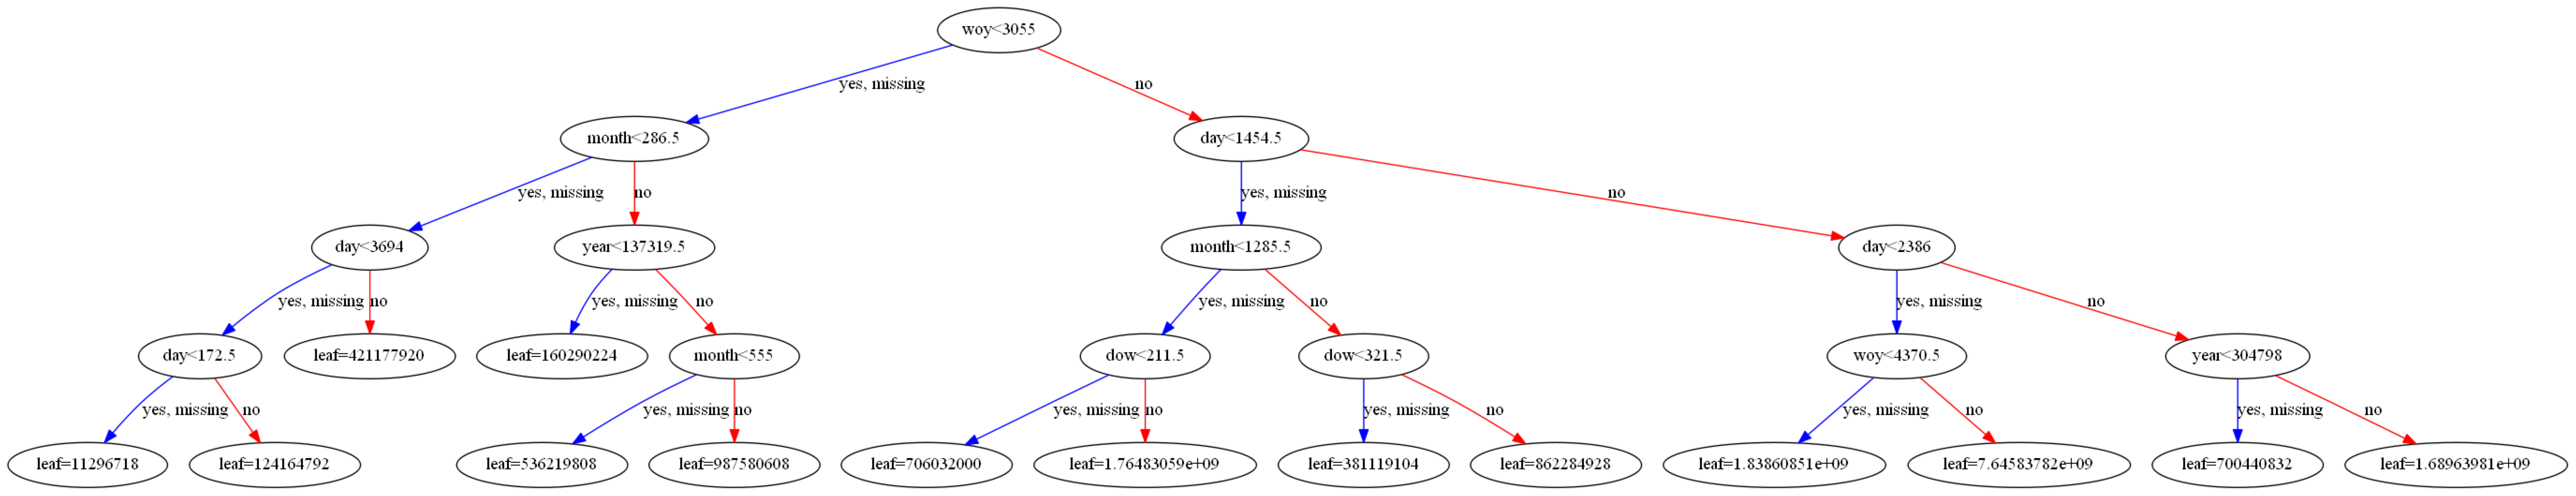

In [69]:

xgboost.plot_tree(XGB_grid_1,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 50]
plt.show()

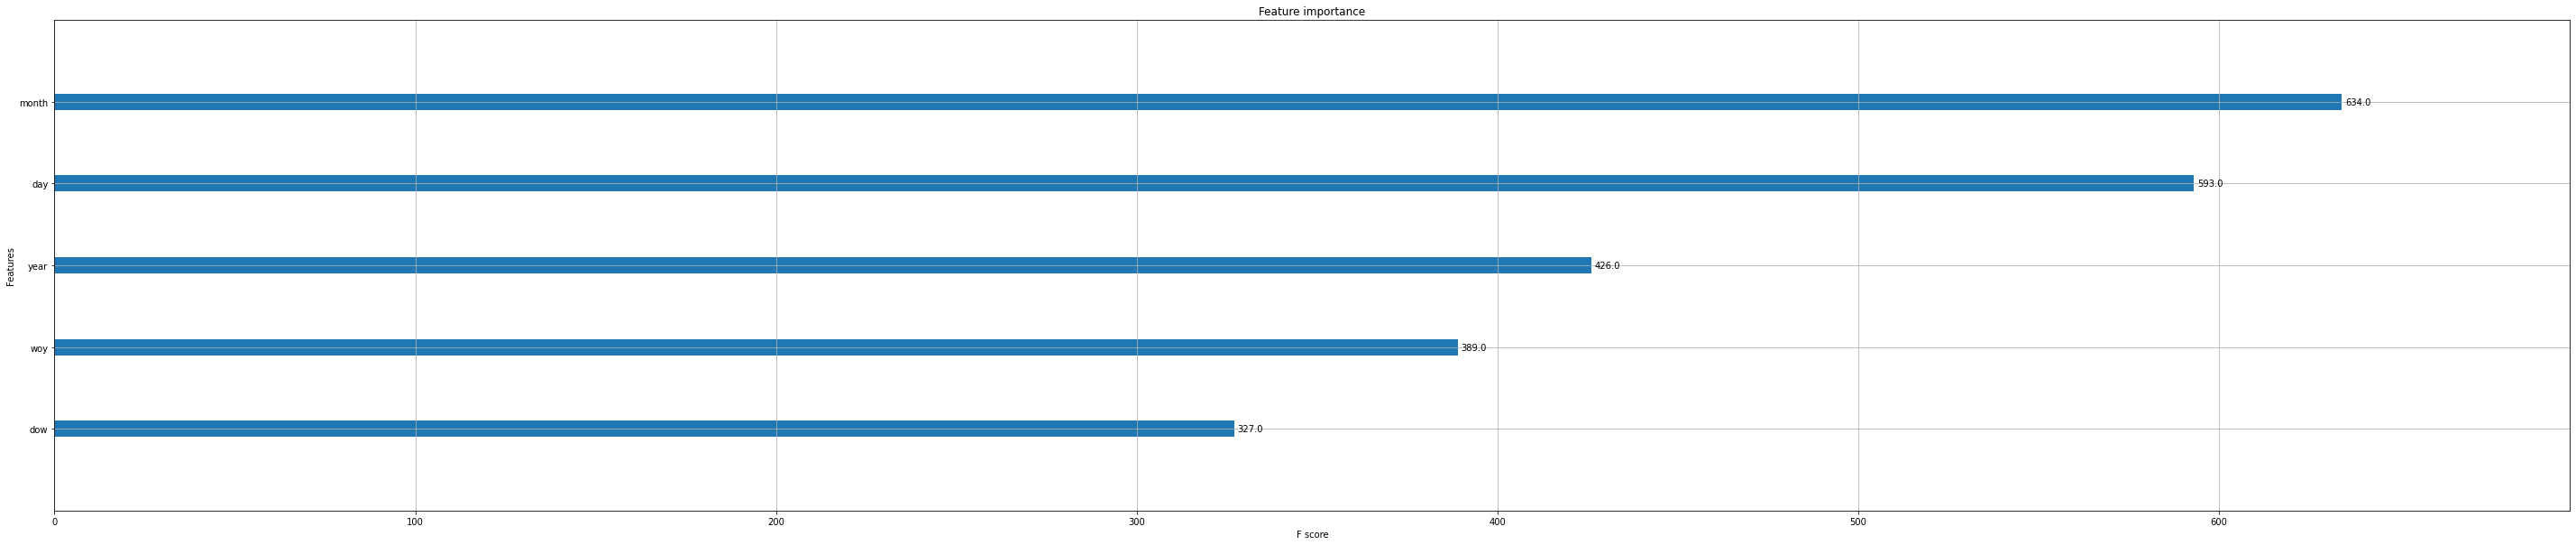

In [31]:
xgboost.plot_importance(XGB_grid_1) # 바로 importance를 반환시켜준다.

In [32]:
score = make_scorer(mean_squared_error)

print('mean_squared_error = ', score(XGB_grid_2, X_train, y_train))

mean_squared_error =  1.8658851739410985e+21


In [33]:

score = make_scorer(r2_score)

print('r2_score = ', score(XGB_grid_2, X_train, y_train))

r2_score =  0.8737042717120507


In [34]:

score = make_scorer(r2_score)

print('r2_score = ', score(XGB_grid_2, X_test, y_test))
# 훈련데이터에는 성과가 좋지만, 실제 데이터에서는 안좋음 ->> High variance!
# 

r2_score =  0.14336969111516418


In [35]:
XGB_grid_2_predict.shape

(52,)

In [36]:
df_test_2_grouper.head(2)

,입찰공고차수,합계수량,합계금액,추정가격,배정예산,입찰서개시일자,입찰서마감일자,개찰일자,낙찰하한율,day,month,year,hour,dow,woy
공고게시일자,,,,,,,,,,,,,,,
2021-01-31,270,0.0,0.0,0.0,7.337226e+09,0.0,3.961199e+09,3961199781,0.0,5280,196,396116,0,380,784
2021-02-07,312,0.0,0.0,0.0,2.734706e+10,0.0,4.183514e+09,4183513757,0.0,581,414,418347,0,374,1035


In [37]:
df1 = pd.DataFrame(XGB_grid_2_predict,index=X_test.index)

In [38]:
df2 = pd.DataFrame(y_test,index = X_test.index)

In [39]:
## Test Data에 대한 그래프
fig = go.Figure()
fig
fig.add_trace(go.Scatter(x = df1.index, y = df1[0], name = '예측값'))
fig.add_trace(go.Scatter(x = df2.index, y = df2[df2.columns[0]],name = '실제값'))

fig.show()

In [40]:
XGB_grid_2_predict_train = XGB_grid_2.predict(X_train)

In [41]:
df1_1 = pd.DataFrame(XGB_grid_2_predict_train,index=X_train.index)
df2_1 = pd.DataFrame(y_train,index = X_train.index)

In [42]:
## Train Data에 대한 그래프
fig = go.Figure()
fig
fig.add_trace(go.Scatter(x = df1.index, y = df1[0], name = 'Train_예측값'))
fig.add_trace(go.Scatter(x = df2.index, y = df2[df2_1.columns[0]],name = 'Train_실제값'))
fig.add_trace(go.Scatter(x = df1_1.index, y = df1_1[0], name = 'Test_예측값'))
fig.add_trace(go.Scatter(x = df2_1.index, y = df2_1[df2_1.columns[0]],name = 'Test_실제값'))
fig.add_vline(x = '2021-01-01',line_dash="dash")
fig.add_annotation(
            x="2021-01-30",
            y=10**12,
            text="<b>예측</b>",
            showarrow=False,
            font=dict(
                size=15,
                color = 'red'
                ),
            align="center",
            ax=40,
            ay=-30,

)
fig.add_annotation(
            x="2020-12-01",
            y=10**12,
            text="<b>학습</b>",
            showarrow=False,
            font=dict(
                size=15,
                color = 'blue'
                ),
            align="center",
            ax=40,
            ay=-30,

)
fig.show()


## Random Forest Regression + GridSearch

In [43]:

n_estimators = [800, 1000, 1200]
max_depth = [10, 12, 15]
min_samples_split = [4, 5, 6]
min_samples_leaf = [4, 5, 6]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

random_grid = GridSearchCV(estimator = RandomForestRegressor(), param_grid = hyperparams, 
                verbose=True, scoring=mean_squared_log_error, cv=5, n_jobs=-1)

random_grid.fit(X_train, y_train)
print(random_grid.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 800}


In [44]:
random_grid_1= random_grid.best_estimator_
random_grid_2 = random_grid_1.fit(X_train, y_train)
random_grid_2_predict = random_grid_2.predict(X_test)

In [45]:
df3 = pd.DataFrame(random_grid_2_predict,index=X_test.index)


In [46]:
df3_1 = pd.DataFrame(random_grid_2.predict(X_train),index=X_train.index)

In [47]:
pd.concat([df3_1.head(),df3.head()],axis=1)

,0,0
공고게시일자,,
2017-01-29,1.489696e+08,NaN
2017-02-05,1.309372e+08,NaN
2017-02-12,2.795354e+08,NaN
2017-02-19,2.773000e+08,NaN
2017-02-26,2.756520e+08,NaN
2021-01-31,NaN,2.982512e+10
2021-02-07,NaN,2.621162e+10
2021-02-14,NaN,1.078927e+10
2021-02-21,NaN,3.143020e+10


In [48]:
print('r2_score = ', score(random_grid_2, X_train, y_train))
# 훈련데이터에서조차도 성능이 좋지 못하다.

r2_score =  0.506883479088162


In [49]:
print('r2_score = ', score(random_grid_2, X_test, y_test))
# 더 성능이 안좋아진 것을 알 수 있다.

r2_score =  0.12203216113122184


In [50]:
df_test_1_grouper.head(2)

,index,입찰공고차수,합계수량,합계금액,추정가격,배정예산,입찰서개시일자,입찰서마감일자,개찰일자,낙찰하한율,day,month,year,hour,dow,woy
공고게시일자,,,,,,,,,,,,,,,,
2017-01-29,0,0,5.0,170000000.0,154545455.0,170826630.0,20170131.0,20170202.0,20170202,80.495,24,1,2017,0,1,4
2017-02-05,6,0,5.0,170000000.0,154545455.0,170826630.0,20170208.0,20170210.0,20170210,0.000,2,2,2017,0,3,5


### 구분
- df3 : RandomForest train data / df3_1 : RandomForest test data
- df2 :  train data / df2_1 : test data
- df1 : XGBoost train data / df3_1 : XGBoost test data

In [51]:
## Train Data에 대한 그래프
## Train Data에 대한 그래프
fig = go.Figure()
fig
fig.add_trace(go.Scatter(x = df3.index, y = df3[0], name = 'Test_예측값'))
fig.add_trace(go.Scatter(x = df2.index, y = df2[df2.columns[0]],name ='Test_실제값'))
fig.add_trace(go.Scatter(x = df3_1.index, y = df3_1[0], name = 'Train_예측값'))
fig.add_trace(go.Scatter(x = df2_1.index, y = df2_1[df2_1.columns[0]],name =  'Train_실제값'))
fig.add_vline(x = '2021-01-01',line_dash="dash")
fig.add_annotation(
            x="2021-01-30",
            y=10**12,
            text="<b>예측</b>",
            showarrow=False,
            font=dict(
                size=15,
                color = 'red'
                ),
            align="center",
            ax=40,
            ay=-30,

)
fig.add_annotation(
            x="2020-12-01",
            y=10**12,
            text="<b>학습</b>",
            showarrow=False,
            font=dict(
                size=15,
                color = 'blue'
                ),
            align="center",
            ax=40,
            ay=-30,

)
fig.show()


In [52]:
# Total
fig = go.Figure()

fig.add_trace(go.Scatter(x = df2.index, y = df2[df2_1.columns[0]],name = 'Test_실제값',marker_color = 'blue'))
fig.add_trace(go.Scatter(x = df2_1.index, y = df2_1[df2_1.columns[0]],name = 'Train_실제값',marker_color = 'blue'))
fig.add_trace(go.Scatter(x = df1.index, y = df1[0], name = 'Test_예측값_XGBOOST',marker_color = 'red'))#,mode='lines+markers'

fig.add_trace(go.Scatter(x = df1_1.index, y = df1_1[0], name = 'Train_예측값_XGBOOST',marker_color = 'red'))


fig.add_trace(go.Scatter(x = df3.index, y = df3[0], name = 'Test_예측값_RandomForest',marker_color = 'green'))

fig.add_trace(go.Scatter(x = df3_1.index, y = df3_1[0], name = 'Train_예측값_RandomForest',marker_color = 'green'))
fig.add_vline(x = '2021-01-01',line_dash="dash")
fig.add_annotation(
            x="2021-02-20",
            y=10**12,
            text="<b>예측</b>",
            showarrow=False,
            font=dict(
                size=15,
                color = 'black'
                ),
            align="center",
            ax=40,
            ay=-30,

)
fig.add_annotation(
            x="2020-11-15",
            y=10**12,
            text="<b>학습</b>",
            showarrow=False,
            font=dict(
                size=15,
                color = 'black'
                ),
            align="center",
            ax=40,
            ay=-30,

)

fig.update_layout(
    autosize=False,
    width=1500,
    height=700,
    title= '물품 : 방위사업청 대한 수요예측 '
    )

fig.update_xaxes(title = '주 단위 시계열 (2020/01/05 ~ 2021/01/23)')
fig.update_yaxes(title = '주별 예산 총액')

fig.write_html("주별.html")
fig.show()

In [53]:
score = make_scorer(mean_absolute_error)

a = score(random_grid_2, X_test, y_test)
b = score(XGB_grid_2, X_test, y_test)
c = score(model_made_1, X_test, y_test)
pd.DataFrame([a,b,c],index = ['Random_Forest_Regression','XGBoost_Regression','Linear_Regression'],columns=['mean_abosolute_error']).iplot(kind ='bar',title = 'Mean_Square_Error')

In [54]:
score = make_scorer(r2_score)


a = score(random_grid_2, X_test, y_test)
b = score(XGB_grid_2, X_test, y_test)
c = score(model_made_1, X_test, y_test)
pd.DataFrame([a,b,c],index = ['Random_Forest_Regression','XGBoost_Regression','Linear_Regression'],columns=['R_square']).iplot(kind ='bar',title = 'R_square For Test data')

In [55]:
score = make_scorer(r2_score)


a = score(random_grid_2, X_train, y_train)
b = score(XGB_grid_2, X_train, y_train)
c = score(model_made_1, X_train, y_train)
pd.DataFrame([a,b,c],index = ['Random_Forest_Regression','XGBoost_Regression','Linear_Regression'],columns=['R_square']).iplot(kind ='bar',title = 'R_square For Train data')

In [56]:
df_test_1_grouper.shape

(206, 16)


## 기관의 관점에서 예산(수요)의 예측을 보면 다음과 같이 관찰이 되어졌습니다. 
## 만약 업체의 관점에서 보자면, 물품에 대한 갯수의 사용량을 보아야 하는데, 그것 또한 기관별로 다르게 보아야 한다. 그러므로 방금 한 수요예측은 (나의 관점으로는 예산에 대한 예측)
## 그리고 세부물품번호가 같더라도 물품이 다르다.... 물품에 대한 예측이 원천적으로 힘들다. 같은 세부물품번호라도 말하는 제품이 달라서 뭘 원하는지 모르겠다. 직접 공고문을 읽고 진행하여야 실제 물품이 무엇인지 알 수 있다.

In [57]:
df_test.columns

Index(['index', '조달구분', '공고시스템명', '입찰공고번호', '입찰공고차수', '공고게시일자', '실수요기관명',
       '수요기관명', '수요기관코드', '수요기관구분', '품명내용', '세부품명내용', '합계수량', '합계금액', '납품기한',
       '긴급공고여부', '정정공고여부', '취소공고여부', '추정가격', '배정예산', '입찰서개시일자', '입찰서마감일자',
       '개찰일자', '입찰방식', '재입찰허용여부', '낙찰자결정방법', '입찰계약방법', '낙찰하한율', '예가방법',
       '조달요청번호', 'day', 'month', 'year', 'hour', 'dow', 'woy'],
      dtype='object')

In [58]:
df_test.head(1).T

,1305
index,1305
조달구분,중앙조달
공고시스템명,NaN
입찰공고번호,20200318789
입찰공고차수,0
공고게시일자,2020-03-12 00:00:00
실수요기관명,방위사업청
수요기관명,방위사업청
수요기관코드,1690000
수요기관구분,국가기관


In [59]:
df_test[ '세부품명내용']

1305        정품토너[4410310302]
34606     노트북컴퓨터[4321150301]
37499       정품토너[4410310302]
39028      트럭크레인[2410162401]
41387      트럭크레인[2410162401]
                 ...        
136063                   NaN
136064                   NaN
136065                   NaN
136066                   NaN
136067                   NaN
Name: 세부품명내용, Length: 24028, dtype: object

In [60]:
df_test_1_grouper

,index,입찰공고차수,합계수량,합계금액,추정가격,배정예산,입찰서개시일자,입찰서마감일자,개찰일자,낙찰하한율,day,month,year,hour,dow,woy
공고게시일자,,,,,,,,,,,,,,,,
2017-01-29,0,0,5.0,170000000.0,154545455.0,1.708266e+08,20170131.0,2.017020e+07,20170202,80.495,24,1,2017,0,1,4
2017-02-05,6,0,5.0,170000000.0,154545455.0,1.708266e+08,20170208.0,2.017021e+07,20170210,0.000,2,2,2017,0,3,5
2017-02-12,7,0,5.0,170000000.0,154545455.0,1.708266e+08,20170214.0,2.017022e+07,20170216,0.000,10,2,2017,0,4,6
2017-02-19,1,0,1.0,443847600.0,403497818.0,4.454314e+08,20170308.0,2.017031e+07,20170310,0.000,16,2,2017,0,3,7
2017-02-26,2,0,5.0,170000000.0,154545455.0,1.708266e+08,20170223.0,2.017022e+07,20170223,0.000,23,2,2017,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-06,12618210,139,1.0,219910800.0,199918909.0,1.158117e+11,20201211.0,2.161529e+09,2161529439,0.000,875,1262,216140,0,215,5243
2020-12-13,10687813,131,0.0,0.0,0.0,7.513172e+10,0.0,1.818109e+09,1818109498,0.000,838,1080,181800,0,208,4500
2020-12-20,6544001,82,0.0,0.0,0.0,1.394417e+10,0.0,1.111067e+09,1111067261,0.000,881,660,111100,0,111,2805


In [62]:
# import joblib

# joblib.dump(model_made_1, 'Linear_predict_입찰공고내역.pkl')


# joblib.dump(random_grid_2, 'random_grid_입찰공고내역.pkl')

# joblib.dump(XGB_grid_2, 'XGB_grid_입찰공고내역.pkl')
# 모델을 저장

['XGB_grid_입찰공고내역.pkl']

In [65]:
# df_test.to_csv('df_test_입찰공고내역.csv')
# df_test_2.to_csv('df_test_2_입찰공고내역.csv')